# UHF results
This notebook will be used to show that our UHF code is working. We will use slightly different molecules then the RHF ones.

In [1]:
# importing the needed classes
import psi4
import sys
from compChem.Hartree_Fock_modes.uhf import UHFMolecule

In [10]:
# molecule n°1: trihydrogen
psi4.set_options({"basis":"cc-pvdz", "scf_type":"pk", "reference":"uhf", "e_convergence":"1e-8"})
h3 = UHFMolecule("""
H 0 0 0
H 0 0.86602540378 0.5
H 0 0 1
units angstrom""")
h3.setConvergence(1e-8)
end_data = h3.iterator(mute=True, criterion="energy")
f"scf energy {end_data[0]: .14f}, {end_data[1]} iterations"

'scf energy -1.50503553088856, 24 iterations'

In [8]:
psi4.energy("scf")

-1.5050355419903454

In [6]:
# molecule n°2: allyl radical
psi4.set_options({"basis":"sto-3g", "scf_type":"pk", "reference":"uhf", "e_convergence":"1e-12"})
allyl = UHFMolecule("""
0 2
H
C 1 r2
C 2 r3 1 a3
C 2 r3 1 a3 3 180.
H 3 r5 2 a5 1 0.
H 4 r5 2 a5 1 0.
H 3 r7 2 a7 1 180.
H 4 r7 2 a7 1 180.

r2=1.08424658
r3=1.40526604
r5=1.08095381
r7=1.08131649
a3=117.99450641
a5=121.41544408
a7=121.21891262
symmetry c1

""")
allyl.setConvergence(1e-12)
end_data = allyl.iterator(mute=True, criterion="energy")
f"scf energy {end_data[0]: .14f}, {end_data[1]} iterations"


'scf energy -115.05429125205339, 64 iterations'

In [7]:
psi4.energy("scf")

-115.05429125200081

We will now proceed with an unrestricted stretch of hydrogen gas.


In [13]:
psi4.set_options({"basis":"sto-3g", "scf_type":"pk", "reference":"uhf", "e_convergence":"1e-12"})
hydrogen = UHFMolecule("""H""")
hydrogen.setConvergence(1e-12)
h_energy = hydrogen.iterator(mute=True)
h_energy[0]

-0.46658184955727544

In [23]:
import numpy as np
distances = np.arange(0.2, 5, 0.1)
energies = []
for distance in distances:
    h2 = UHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True)
    energies.append(E[0] - 2*h_energy[0])

/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/uhf.py:109: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert self.guessMatrix_a != "empty" and self.guessMatrix_b != "empty", "make a guess first"
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/hf_backbone.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.guessMatrix_a == "empty" and self.guessMatrix_b == "empty":


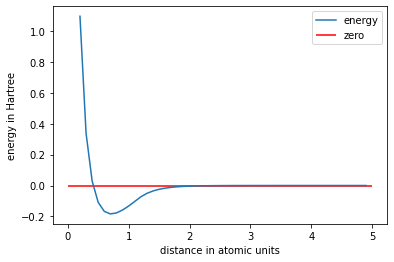

In [22]:
import matplotlib.pyplot as plt
p = plt.plot(distances, energies, label="energy")
plt.hlines(0, 0, 5, color="red", label="zero")
plt.xlabel("distance in atomic units")
plt.ylabel("energy in Hartree")
plt.legend(loc="upper right")
p

We can clearly see that this molecule behaves better then the RHF one. We see that the molecules energy gets closer to zero as we stretch further. This is off course expected.